In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset

In [2]:
df = pd.read_csv("^TNX.csv").set_index("Date")
df.index = pd.to_datetime(df.index)

In [3]:
k = (1-list(sm.tsa.acf(df["Adj Close"],nlags = 12))[12])
long_ir = df['Adj Close'].mean()
drift1 = 0.009
drift2 = 0.0036
riskneutral_ir = df["Adj Close"].iloc[-1] + (drift1/long_ir)
t = 1/12
std = df["Adj Close"].std()

In [4]:
df.tail()

,Adj Close
Date,
2023-01-02,0.03916
2023-01-03,0.03494
2023-01-04,0.03452
2023-01-05,0.03637
2023-01-06,0.03728


In [5]:
future_dates = [df.index[-2] + DateOffset(months=x) for x in range(1, 24)]
future_dates = pd.DataFrame(index=future_dates, columns=['STD*DW',"Model 1",'Model 2','Vasicek','CIR'])
future_dates["Model 1"][0] = df["Adj Close"].iloc[-1]*100
future_dates["Model 2"][0] = df["Adj Close"].iloc[-1]*100
future_dates["Vasicek"][0] = df["Adj Close"].iloc[-1]*100
future_dates["CIR"][0] = df["Adj Close"].iloc[-1]*100


for i in range(1, len(future_dates["Model 1"])):
    future_dates["STD*DW"][i] = std * np.random.normal(0,np.sqrt(t))*100
    future_dates["Model 1"][i] = (future_dates["STD*DW"][i] + future_dates["Model 1"].iloc[i-1])
    future_dates["Model 2"][i] = (future_dates["STD*DW"][i]+ drift1*t + future_dates["Model 2"].iloc[i-1])
    future_dates["Vasicek"][i] = (future_dates["STD*DW"][i]+ k*(riskneutral_ir-future_dates["Vasicek"].iloc[i-1])*t + future_dates["Vasicek"].iloc[i-1])
    future_dates["CIR"][i] = (future_dates["STD*DW"][i]*np.sqrt(future_dates["Vasicek"].iloc[i-1])+ k*(riskneutral_ir-future_dates["Vasicek"].iloc[i-1])*t + future_dates["Vasicek"].iloc[i-1])


future_dates.fillna(0,inplace = True)
future_dates

,STD*DW,Model 1,Model 2,Vasicek,CIR
2023-02-05,0.000000,3.728000,3.728000,3.728000,3.728000
2023-03-05,1.027048,4.755048,4.755798,4.707505,5.663484
2023-04-05,0.561693,5.316742,5.318242,5.208363,5.865364
2023-05-05,-0.414053,4.902689,4.904939,4.726679,4.195787
2023-06-05,0.180490,5.083178,5.086178,4.846073,5.057985
2023-07-05,1.195215,6.278393,6.282143,5.978573,7.414480
2023-08-05,0.674773,6.953167,6.957667,6.575263,7.550386
2023-09-05,0.026352,6.979519,6.984769,6.515436,6.556657
2023-10-05,-0.019804,6.959715,6.965715,6.410264,6.379517
2023-11-05,-0.745080,6.214634,6.221384,5.581242,4.439891


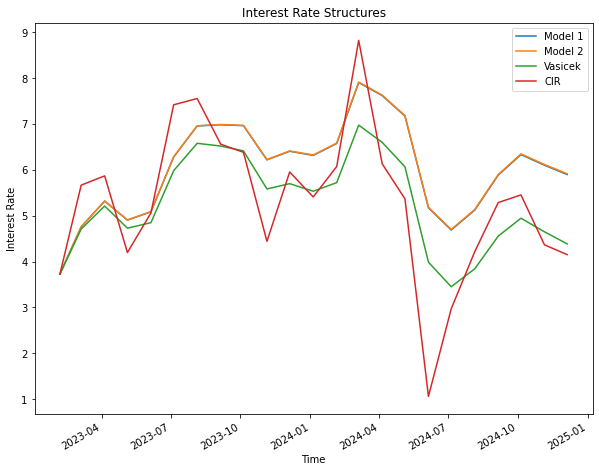

In [6]:
columns_to_plot = ['Model 1','Model 2','Vasicek','CIR']
future_dates[columns_to_plot].plot(kind='line',figsize = (10,8))
plt.xlabel('Time')
plt.ylabel('Interest Rate')
plt.title('Interest Rate Structures')
plt.legend()
plt.show()